# Sprint0授業前課題 機械学習スクラッチ入門 

## 【問題1】train_test_splitのスクラッチ
まずはスクラッチの練習として、scikit-learnのtrain_test_splitを自作してみましょう。Jupyter Notebookでコーディングを進め、完成後はpyファイルとします。utilsディレクトリの中にsplit.pyを作ってください。

[sklearn.model_selection.train_test_split — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**雛形**

```

def train_test_split(X, y, train_size=0.8,):
    """
    学習用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    pass

    return X_train, X_test, y_train, y_test

```
    
**テストの重要性**

scikit-learnのtrain_test_splitと同じ動作をしているか必ずテストをするようにしましょう。ライブラリが存在するものをスクラッチする学習方法は動作の正しさを確認しやすいという利点があります。

In [1]:
# モジュール配置されているパスを取得
import sys
sys.path.append("/Users/yusuke-saruya/diveintocode-ml/full-time/diveintocode-term1/ml-scratch/utils/")

In [2]:
# split.pyをインポート
import split

In [3]:
# ライブラリインポート
from sklearn.datasets import load_iris
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#irisデータセットの読み込み
iris = load_iris()

# 説明変数をPandasのDataFrame型変数Xに格納
X = DataFrame(iris.data, columns = iris.feature_names)

# 目的変数をPandasのDataFrame型変数yに格納し、カラム名を"Species"に変更
y = DataFrame(iris.target, columns = ["Species"])

#X,yを結合させたDataFrame型変数dfを作成(確認用)
df = pd.concat([X, y], sort=False, axis=1)

# ndarray型にする
X = X.values
y = y.values

In [4]:
# split.pyを利用してデータセットを分割
X_train, X_test, y_train, y_test = split.train_test_split(
    X, y,train_size=0.75, random_state=10)

In [5]:
#データ行列数確認
print('X_train : {}, X_test : {}'.format(X_train.shape, X_test.shape))
print('y_train : {}, y_test : {}'.format(y_train.shape, y_test.shape))

X_train : (112, 4), X_test : (38, 4)
y_train : (112, 1), y_test : (38, 1)


## 【問題2】 分類パイプラインの作成
分類は3種類の手法を扱います。pyファイルで実行できる分類のパイプラインを作成してください。

- ロジスティック回帰
- SVM
- 決定木

データセットは3種類用意します。

1つ目は事前学習期間同様にirisデータセットです。

[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。

- virgicolorとvirginica

また、残り2つは可視化が可能な特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。

**シンプルデータセット1作成コード**

```

import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]


```


**シンプルデータセット2作成コード**

```

X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
       
```


### 1.Irisデータセット

In [6]:
"""
<Species>
0:setosa
1:versicolor
2:virginica'
"""

# 1:versicolor,2:virginica'のデータセット
df_2 = df[df['Species']!=0]

#説明変数Xと目的変数yに分割
X = df_2.iloc[:, 0:4].values
y = df_2.iloc[:, 4:].values

# split.pyを利用してデータセットを分割
X_train, X_test, y_train, y_test = split.train_test_split(
    X, y,train_size=0.75, random_state=10)

#### 1-1.ロジスティック回帰

In [7]:
# classify_pipeline.pyをインポート
#特徴量が２地の場合決定領域グラフも表示する
import classify_pipeline

# ロジスティクス回帰での指標値出力
classify_pipeline.logistic_regression(X_train, X_test, y_train.reshape(-1), y_test)

<LogisticRegression>
accuracy:1.0
precision:1.0
recall:1.0
f値:1.0


#### 1-2.SVM

In [8]:
# SVMでの指標値出力
classify_pipeline.svm(X_train, X_test, y_train.reshape(-1), y_test)

<SVM>
accuracy:1.0
precision:1.0
recall:1.0
f値:1.0


#### 1-3.決定木

In [9]:
# 決定木での指標値出力
classify_pipeline.decision_tree(X_train, X_test, y_train.reshape(-1), y_test)

<DecisionTreeClassifier>
accuracy:1.0
precision:1.0
recall:1.0
f値:1.0


### 2.シンプルデータセット1

In [10]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

# split.pyを利用してデータセットを分割
X_train, X_test, y_train, y_test = split.train_test_split(
    X, y,train_size=0.75, random_state=10)

#### 2-1.ロジスティック回帰

<LogisticRegression>
accuracy:1.0
precision:1.0
recall:1.0
f値:1.0


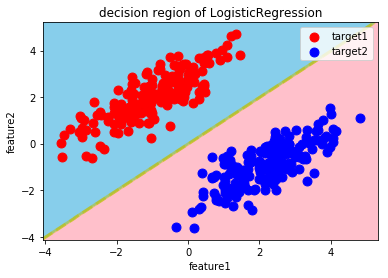

In [11]:
# ロジスティクス回帰での指標値出力
classify_pipeline.logistic_regression(X_train, X_test, y_train.reshape(-1), y_test)

#### 2-2.SVM

<SVM>
accuracy:1.0
precision:1.0
recall:1.0
f値:1.0


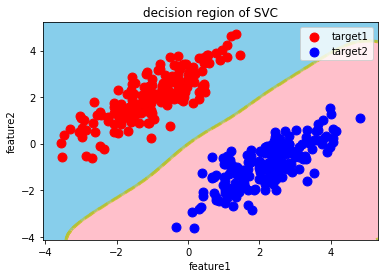

In [12]:
# SVMでの指標値出力
classify_pipeline.svm(X_train, X_test, y_train.reshape(-1), y_test)

#### 2-3.決定木

<DecisionTreeClassifier>
accuracy:1.0
precision:1.0
recall:1.0
f値:1.0


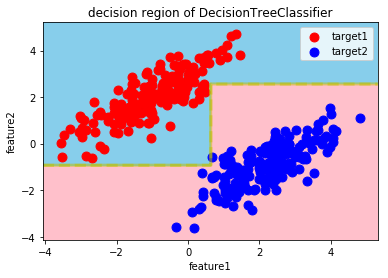

In [13]:
# 決定木での指標値出力
classify_pipeline.decision_tree(X_train, X_test, y_train.reshape(-1), y_test)

### 3.シンプルデータセット2

In [14]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# split.pyを利用してデータセットを分割
X_train, X_test, y_train, y_test = split.train_test_split(
    X, y,train_size=0.75, random_state=10)

#### 3-1.ロジスティック回帰

<LogisticRegression>
accuracy:0.7
precision:0.75
recall:0.6
f値:0.6666666666666665


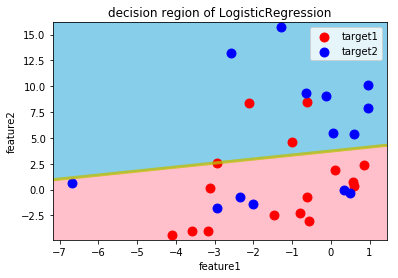

In [15]:
# ロジスティクス回帰での指標値出力
classify_pipeline.logistic_regression(X_train, X_test, y_train.reshape(-1), y_test)

#### 3-2.SVM

<SVM>
accuracy:0.9
precision:0.8333333333333334
recall:1.0
f値:0.9090909090909091


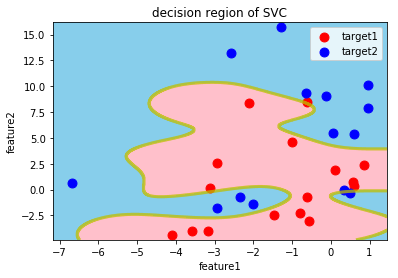

In [16]:
# SVMでの指標値出力
classify_pipeline.svm(X_train, X_test, y_train.reshape(-1), y_test)

#### 3-3.決定木

<DecisionTreeClassifier>
accuracy:1.0
precision:1.0
recall:1.0
f値:1.0


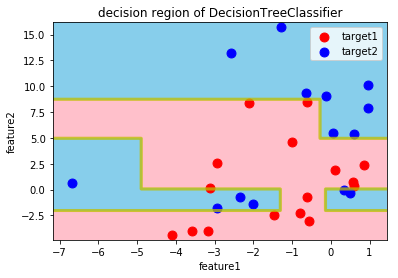

In [17]:
# 決定木での指標値出力
classify_pipeline.decision_tree(X_train, X_test, y_train.reshape(-1), y_test)

### 【問題3】 回帰パイプラインの作成
回帰は1種類を扱います。pyファイルで実行できる回帰のパイプラインを作成してください。

- 線形回帰  

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

In [18]:
# モジュールをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

# train.csvの読み込み
df_train = pd.read_csv("train.csv")

#GrLivAreaとYearBuiltを抜き出す
df_extract = df_train.loc[:, ['GrLivArea', 'YearBuilt']]

#GrLivAreaとYearBuiltと目的変数SalePriceを抜き出す
df_extract_P = df_train.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]

#ndarrayへ変換を行う(標準化のためにfloat型にする)
X = np.array(df_extract, dtype=float)
y = np.array(df_extract_P.loc[:,['SalePrice']], dtype=float)

#学習データ、検証データ分割ライブラリのインポート
from sklearn.model_selection import train_test_split

#学習用データ75%、検証データに25%分割する
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=30)

In [19]:
#回帰パイプラインのインポート
import regression_pipeline

[MSE] 学習用データ : 2148457396.776, 検証用データ : 2325844746.508
[R^2] 学習用データ : 0.640, 検証用データ : 0.681


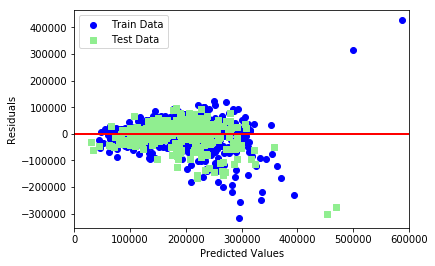

In [20]:
# 線形回帰モジュールのインポート
from sklearn.linear_model import LinearRegression

#インスタンス生成、学習用データを線形回帰モデルを作成(デフォルトで実行)
reg = LinearRegression()

#回帰の結果（指標値、残差プロットの出力）
regression_pipeline.regression(X_train, X_test, y_train, y_test, reg)